In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam
0,2020-1-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-1-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-1-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-1-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-1-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-3-25,84.0,146.0,302.0,188.0,3.0,3.0,387.0,265.0,2364.0,...,2.0,3.0,1.0,59.0,2.0,2.0,2.0,0.0,0.0,0.0
64,2020-3-26,94.0,174.0,367.0,224.0,4.0,7.0,502.0,290.0,2810.0,...,2.0,6.0,1.0,84.0,2.0,4.0,2.0,71.0,0.0,0.0
65,2020-3-27,110.0,186.0,409.0,267.0,4.0,7.0,589.0,329.0,3143.0,...,2.0,6.0,1.0,91.0,2.0,11.0,2.0,86.0,8.0,0.0
66,2020-3-28,110.0,197.0,454.0,308.0,5.0,7.0,690.0,407.0,3640.0,...,2.0,8.0,3.0,98.0,2.0,18.0,2.0,91.0,8.0,2.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a growth factor df
growth_data_to_use = data_to_use.copy()

In [11]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = data_to_use[country][x] / data_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = data_to_use[country][x]

In [22]:
growth_data_to_use["United Arab Emirates"].tail(10)

58    1.000000
59    1.092857
60    1.000000
61    1.294118
62    1.252525
63    1.342742
64    1.000000
65    1.216216
66    1.155556
67    1.217949
Name: United Arab Emirates, dtype: float64

In [13]:
growth_data_to_use["China"].tail(20)

48    1.000334
49    1.000420
50    1.000136
51    1.000161
52    1.000395
53    1.000321
54    1.000370
55    1.000309
56    1.000543
57    1.000666
58    1.001158
59    1.000677
60    1.001599
61    1.000774
62    1.001141
63    1.000858
64    1.001482
65    1.001406
66    1.001245
67    1.001500
Name: China, dtype: float64

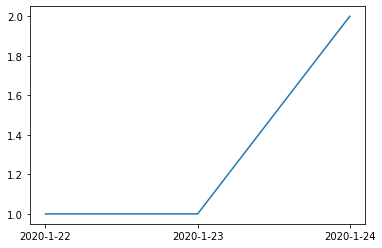

In [14]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [15]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [23]:
#collecting data for plotting a logistic curve to check status
up_country = []
growth_factor = []
cases = []
analysis = []
for country in countries:
    
        if growth_data_to_use[country][len(data)-6] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif growth_data_to_use[country][len(data)-7] <= 1 and (growth_data_to_use[country][len(data)-1] <=1 and growth_data_to_use[country][len(data)-4] > growth_data_to_use[country][len(data)-2]) or data_to_use[country][len(data)-1] < 50 or growth_data_to_use[country][len(data)-1] == 1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif growth_data_to_use[country][len(data)-10] <= 1 and (growth_data_to_use[country][len(data)-1] <2) or data_to_use[country][len(data)-1] < 229:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif growth_data_to_use[country][len(data)-7] > 1 and growth_data_to_use[country][len(data)-1] <2 :
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis

In [24]:
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis
114,Papua New Guinea,1.000000,1.0,COVID-19 Spread Can Be Contained!
125,Saint Vincent and the Grenadines,1.000000,1.0,COVID-19 Spread Can Be Contained!
163,Timor-Leste,1.000000,1.0,COVID-19 Spread Can Be Contained!
173,MS Zaandam,1.000000,2.0,New to The Pandemic
170,Saint Kitts and Nevis,1.000000,2.0,New to The Pandemic
...,...,...,...,...
60,Germany,1.076263,62095.0,COVID-19 Spread Has Gotten Out of Control!
136,Spain,1.093876,80110.0,COVID-19 Spread Has Gotten Out of Control!
32,China,1.001500,82122.0,COVID-19 Spread Has Gotten Out of Control!
77,Italy,1.056417,97689.0,COVID-19 Spread Has Gotten Out of Control!


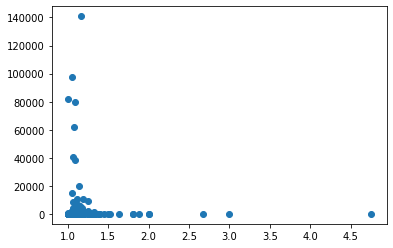

In [25]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [26]:
growth_chart_df.to_csv("growth_category.csv")